In [2]:
from dfLoader import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import argparse
import torch
from evalModel import printClassAccuracy
from dfLoader import classes
import torch.nn as nn
from sklearn.datasets import load_iris  # Replace this with your own dataset
t2np = lambda t: t.detach().cpu().numpy()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from dataAug import *

In [3]:
dataset = torch.load('datasets/Test_dataSet.pt')
X = dataset.tensors[0]
y = dataset.tensors[1]

In [4]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
#     axs.set_title(title or "Spectrogram (db)")
#     axs.set_ylabel(ylabel)
#     axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
#     fig.colorbar(im, ax=axs)
    fig.set_size_inches(3, 10)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'{title}.png', dpi=150)
    plt.show(block=False)
    


/tmp/ipykernel_8227/571447596.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(yticks)
/tmp/ipykernel_8227/571447596.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(yticks)
/tmp/ipykernel_8227/571447596.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(yticks)


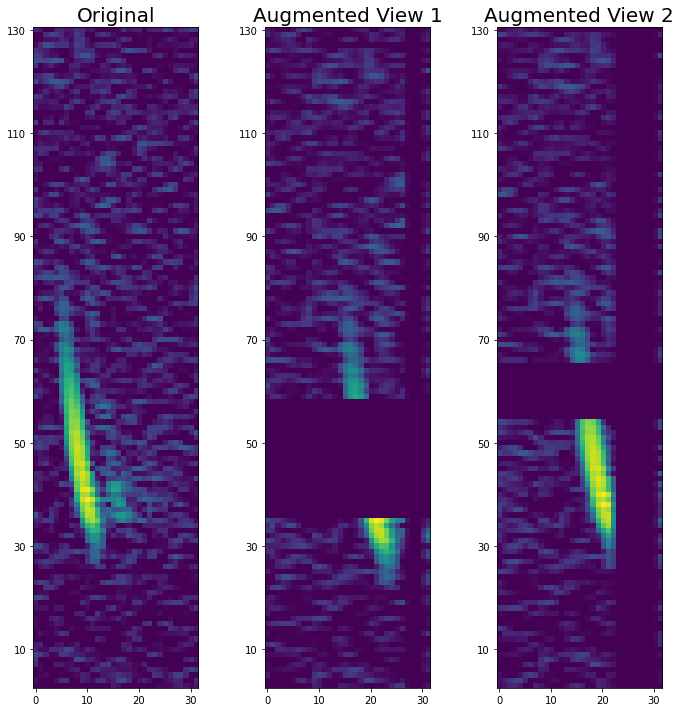

In [69]:
count = 0
col = 1
row = 3
yticks = [0,10,30,50,70,90,110,130,140]
yticks.reverse()
fig, axes = plt.subplots(col, row)
fig.set_size_inches(10, 10)

yticks = [0,10,30,50,70,90,110,130,140]
yticks.reverse()

axes[0].imshow(X[600])
axes[1].imshow(augData1)
axes[2].imshow(augData2)

axes[0].set_title("Original", fontsize=20)
axes[1].set_title("Augmented View 1", fontsize=20)
axes[2].set_title("Augmented View 2", fontsize=20)

axes[0].set_yticklabels(yticks)
axes[1].set_yticklabels(yticks)
axes[2].set_yticklabels(yticks)
plt.tight_layout()
plt.savefig('DataAugExample.pdf', dpi=150)


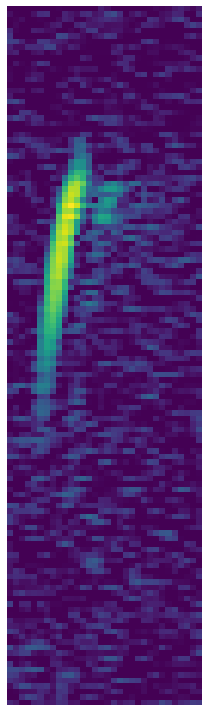

In [5]:
plot_spectrogram(X[600], 'origin')

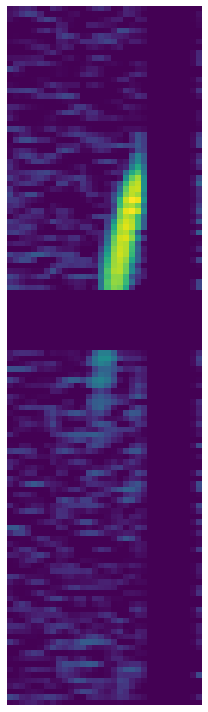

In [60]:
blurrer = VT.GaussianBlur(kernel_size=(5, 5), sigma=(0.1,1.0))

aug_spec = timeMasking(X[600], 10)
aug_spec = freqMasking(aug_spec, 30)
# aug_spec = VT.RandomErasing(p=1,scale=(0.10, 0.40),ratio=(0.3, 0.9))(aug_spec.view(-1,128,32)).view(128,32)


aug_spec = torch.roll(aug_spec,random.randint(0,15), dims = 1)
if(bool(random.getrandbits(1))):
    aug_spec = torch.roll(aug_spec,random.randint(0,7), dims = 0)
else:
    aug_spec = torch.roll(aug_spec,-random.randint(0,7), dims = 0)

if(torch.randint(10,(1,)) >= 2):
    aug_spec = randomStretch(aug_spec,0.2)

if(bool(random.getrandbits(1))):
    aug_spec = blurrer(aug_spec.view(1,128,32)).view(128,32)
aug1 = plot_spectrogram(aug_spec)

In [45]:
augData1 = aug_spec

In [61]:
augData2 = aug_spec

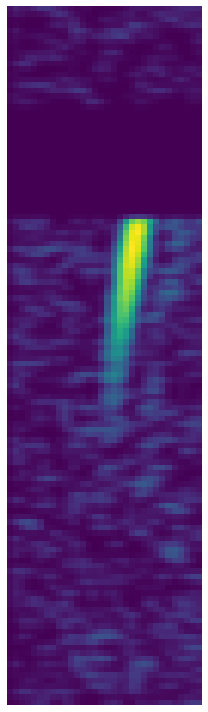

In [30]:
aug1 = plot_spectrogram(aug_spec)

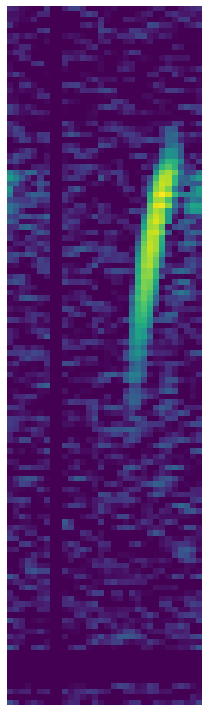

In [42]:
aug2 = plot_spectrogram(aug_spec)